# Effects of Space Weather 

### MSDS 696 Practicum II 
#### Regis University
#### Heather Holcomb 

### Description: 

In [100]:
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
import netCDF4
import seaborn as sns
import numpy as np 
import statsmodels.formula.api as smf
import statsmodels.api

from netCDF4 import Dataset
from scipy import stats

# Space Weather Data Exploratory Data Analysis 

In [2]:
dfSpaceWeather = pd.read_csv('Data\SpaceWeatherData_Cleaned', header = 0, delimiter=r"\s+")

In [3]:
dfSpaceWeather.columns

Index(['yy', 'mm', 'dd', 'BSRN', 'ND', 'Kp', 'Kp.1', 'Kp.2', 'Kp.3', 'Kp.4',
       'Kp.5', 'Kp.6', 'Kp.7', 'Sum', 'Ap', 'Ap.1', 'Ap.2', 'Ap.3', 'Ap.4',
       'Ap.5', 'Ap.6', 'Ap.7', 'Avg', 'Cp', 'C9', 'ISN', 'F10.7', 'Q', 'Ctr81',
       'Lst81', 'F10.7.1', 'Ctr81.1', 'Lst81.1'],
      dtype='object')

In [4]:
#Rename columns to make sense 
dfSpaceWeather = dfSpaceWeather.rename(columns={
    "yy": "Year", 
    "mm": "Month", 
    "dd": "Day", 
    "BSRN": "BartelsSolarRotationNumber", 
    "ND": "NumberofDaywithintheBartels", 
    "Kp": "Kp_0000_0300", 
    "Kp.1": "Kp_0300_0600", 
    "Kp.2": "Kp_0600_0900", 
    "Kp.3": "Kp_0900_1200", 
    "Kp.4": "Kp_1200_1500",
    "Kp.5": "Kp_1500_1800",
    "Kp.6": "Kp_1800_2100",
    "Kp.7": "Kp_2100_0000",
    "Sum": "SumOfKps", 
    "Ap": "PlanetaryEquivalentAmplitude_0000_0300",
    "Ap.1": "PlanetaryEquivalentAmplitude_0300_0600",
    "Ap.2": "PlanetaryEquivalentAmplitude_0600_0900",
    "Ap.3": "PlanetaryEquivalentAmplitude_0900_1200",
    "Ap.4": "PlanetaryEquivalentAmplitude_1200_1500",
    "Ap.5": "PlanetaryEquivalentAmplitude_1500_1800",
    "Ap.6": "PlanetaryEquivalentAmplitude_1800_2100",
    "Ap.7": "PlanetaryEquivalentAmplitude_2100_0000",
    "Avg": "ArithmeticAverageof8Ap",
    "Cp": "PlanetaryDailyCharacterFigure", 
    "C9": "CpConversion", 
    "ISN": "InternationalSunspotNumber",
    "F10.7": "SoloarRadioFlux",
    "Q": "FluxQualifier",
    "Ctr81": "Centered81_dayArithmeticAverageofF10_7",
    "Lst81": "Last81DayArithmeticAverageofF10_7", 
    "F10.7.1": "ObservedValueOfF10_7",
    "Ctr81.1": "Centered81DayArithmeticAverageOfF10_7",
    "Lst81.1": "Last81DayArithmeticAverageOfF10_7"})

In [5]:
dfSpaceWeather.columns

Index(['Year', 'Month', 'Day', 'BartelsSolarRotationNumber',
       'NumberofDaywithintheBartels', 'Kp_0000_0300', 'Kp_0300_0600',
       'Kp_0600_0900', 'Kp_0900_1200', 'Kp_1200_1500', 'Kp_1500_1800',
       'Kp_1800_2100', 'Kp_2100_0000', 'SumOfKps',
       'PlanetaryEquivalentAmplitude_0000_0300',
       'PlanetaryEquivalentAmplitude_0300_0600',
       'PlanetaryEquivalentAmplitude_0600_0900',
       'PlanetaryEquivalentAmplitude_0900_1200',
       'PlanetaryEquivalentAmplitude_1200_1500',
       'PlanetaryEquivalentAmplitude_1500_1800',
       'PlanetaryEquivalentAmplitude_1800_2100',
       'PlanetaryEquivalentAmplitude_2100_0000', 'ArithmeticAverageof8Ap',
       'PlanetaryDailyCharacterFigure', 'CpConversion',
       'InternationalSunspotNumber', 'SoloarRadioFlux', 'FluxQualifier',
       'Centered81_dayArithmeticAverageofF10_7',
       'Last81DayArithmeticAverageofF10_7', 'ObservedValueOfF10_7',
       'Centered81DayArithmeticAverageOfF10_7',
       'Last81DayArithmeticAverageO

In [6]:
def myPlot(x,y):
    x = x
    y = y
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(x,y, color = 'green', linestyle='dashed', linewidth=3, marker='x', markerfacecolor = 'blue', markersize=10)

In [7]:
is_1957 = dfSpaceWeather['Year']==1957
df_1957 = dfSpaceWeather[is_1957]
is_Oct = df_1957['Month']==10
df_Oct1957 = df_1957[is_Oct]
df_Oct1957

,Year,Month,Day,BartelsSolarRotationNumber,NumberofDaywithintheBartels,Kp_0000_0300,Kp_0300_0600,Kp_0600_0900,Kp_0900_1200,Kp_1200_1500,...,PlanetaryDailyCharacterFigure,CpConversion,InternationalSunspotNumber,SoloarRadioFlux,FluxQualifier,Centered81_dayArithmeticAverageofF10_7,Last81DayArithmeticAverageofF10_7,ObservedValueOfF10_7,Centered81DayArithmeticAverageOfF10_7,Last81DayArithmeticAverageOfF10_7
0,1957,10,1,1700,19,43,40,30,20,37,...,1.1,5.0,236.0,268.0,0.0,265.2,230.6,269.3,266.6,230.9
1,1957,10,2,1700,20,37,37,17,17,27,...,0.7,3.0,234.0,252.0,0.0,266.0,231.4,253.3,267.4,231.7
2,1957,10,3,1700,21,27,20,13,33,37,...,1.0,5.0,242.0,265.0,0.0,266.7,232.3,266.3,268.1,232.7
3,1957,10,4,1700,22,30,30,23,27,23,...,0.7,3.0,217.0,237.0,0.0,267.4,232.9,238.2,268.8,233.3
4,1957,10,5,1700,23,30,30,17,23,20,...,0.6,3.0,219.0,245.0,0.0,267.8,233.5,246.2,269.3,233.9
5,1957,10,6,1700,24,17,3,10,7,0,...,0.0,0.0,227.0,250.0,0.0,268.1,233.9,251.2,269.6,234.3
6,1957,10,7,1700,25,10,20,17,17,17,...,0.2,1.0,234.0,253.0,0.0,268.4,234.2,254.3,269.9,234.6
7,1957,10,8,1700,26,17,0,10,7,3,...,0.0,0.0,244.0,261.0,0.0,268.2,234.7,262.6,269.8,235.2
8,1957,10,9,1700,27,3,17,23,17,23,...,0.4,2.0,267.0,275.0,0.0,268.3,235.2,276.6,270.0,235.7
9,1957,10,10,1701,1,30,40,40,30,23,...,1.0,5.0,264.0,275.0,0.0,268.2,235.6,276.6,269.8,236.1


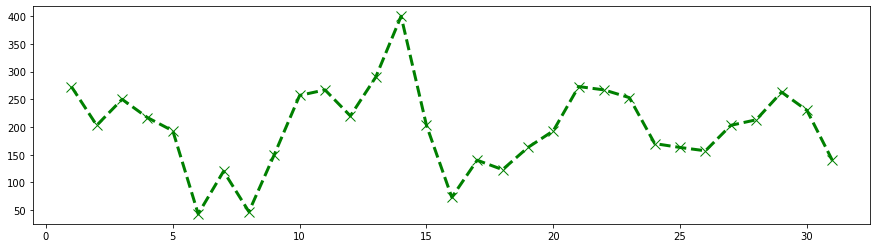

In [8]:
x = df_Oct1957.Day
y = df_Oct1957.SumOfKps
myPlot(x,y)

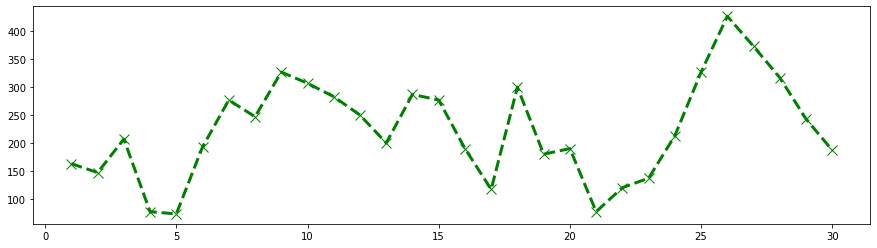

In [9]:
is_Nov = df_1957['Month']==11
df_Nov1957 = df_1957[is_Nov]
df_Nov1957
x_Nov1957 = df_Nov1957.Day
y_Nov1957 = df_Nov1957.SumOfKps
myPlot(x_Nov1957, y_Nov1957)

In [10]:
dfSpaceWeather.Year.unique()

array([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [11]:
#Create a new dataFrame for Space Weather
#Do average values for each month
dfSpaceWeatherAverage = dfSpaceWeather.groupby(['Year', 'Month'])['SumOfKps', 'ArithmeticAverageof8Ap', 'PlanetaryDailyCharacterFigure'].mean()
dfSpaceWeatherAverage

c:\users\heath\.conda\envs\opencv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


SumOfKps  ArithmeticAverageof8Ap  PlanetaryDailyCharacterFigure
Year Month                                                                   
1957 10     198.612903               13.774194                       0.683871
     11     223.766667               18.033333                       0.810000
     12     232.483871               17.741935                       0.841935
1958 1      208.387097               14.741935                       0.738710
     2      265.642857               26.857143                       0.978571
...                ...                     ...                            ...
2019 11      79.333333                4.200000                       0.156667
     12      67.419355                3.064516                       1.870968
2020 1       98.709677                4.806452                       5.935484
     2      126.206897                6.413793                       0.379310
     3      107.636364                4.818182                      15.181818

[750 rows x 3 columns]

In [12]:
spaceWeather_dict = dfSpaceWeather.groupby(['Year','Month']).agg({
    'SumOfKps': 'mean',
    'ArithmeticAverageof8Ap': 'mean',
    'PlanetaryDailyCharacterFigure': 'mean',
    'NumberofDaywithintheBartels' : 'mean',
    'PlanetaryDailyCharacterFigure' : 'mean',
    'CpConversion' : 'mean',
    'InternationalSunspotNumber' : 'mean',
    'SoloarRadioFlux' : 'mean',
    'FluxQualifier' : 'mean',
    'Centered81_dayArithmeticAverageofF10_7' : 'mean',
    'Last81DayArithmeticAverageofF10_7' : 'mean',
    'ObservedValueOfF10_7' : 'mean',
    'Centered81DayArithmeticAverageOfF10_7' : 'mean',
    'Last81DayArithmeticAverageOfF10_7' : 'mean'
})
spaceWeather_dict

SumOfKps  ArithmeticAverageof8Ap  PlanetaryDailyCharacterFigure  \
Year Month                                                                      
1957 10     198.612903               13.774194                       0.683871   
     11     223.766667               18.033333                       0.810000   
     12     232.483871               17.741935                       0.841935   
1958 1      208.387097               14.741935                       0.738710   
     2      265.642857               26.857143                       0.978571   
...                ...                     ...                            ...   
2019 11      79.333333                4.200000                       0.156667   
     12      67.419355                3.064516                       1.870968   
2020 1       98.709677                4.806452                       5.935484   
     2      126.206897                6.413793                       0.379310   
     3      107.636364                4.818182                      15.181818   

            NumberofDaywithintheBartels  CpConversion  \
Year Month                                              
1957 10                       14.838710      3.225806   
     11                       15.000000      3.700000   
     12                       14.000000      3.903226   
1958 1                        12.774194      3.354839   
     2                        13.750000      4.500000   
...                                 ...           ...   
2019 11                       14.200000      0.566667   
     12                       14.709677     70.967742   
2020 1                        15.225806     72.322581   
     2                        14.862069     71.034483   
     3                         6.000000     57.181818   

            InternationalSunspotNumber  SoloarRadioFlux  FluxQualifier  \
Year Month                                                               
1957 10                     253.806452       281.225806       0.000000   
     11                     210.866667       256.100000       0.000000   
     12                     239.419355       284.322581       0.129032   
1958 1                      202.451613       247.870968       0.000000   
     2                      164.928571       209.857143       0.142857   
...                                ...              ...            ...   
2019 11                       0.500000        68.663333       0.000000   
     12                       0.000000        70.593548      68.380645   
2020 1                        0.000000        71.490323      70.090323   
     2                        0.000000        71.275862      71.362069   
     3                       12.909091        71.163636      71.581818   

            Centered81_dayArithmeticAverageofF10_7  \
Year Month                                           
1957 10                                 269.212903   
     11                                 270.756667   
     12                                 268.045161   
1958 1                                  251.338710   
     2                                  233.932143   
...                                            ...   
2019 11                                  68.796667   
     12                                  73.248387   
2020 1                                   74.709677   
     2                                   72.800000   
     3                                   71.172727   

            Last81DayArithmeticAverageofF10_7  ObservedValueOfF10_7  \
Year Month                                                            
1957 10                            241.138710            283.109677   
     11                            266.740000            259.216667   
     12                            269.800000            289.358065   
1958 1                             271.277419            251.506452   
     2                             257.303571            211.796429   
...                                       ...          

In [13]:
dfSpaceWeatherAverage = pd.DataFrame(spaceWeather_dict)

# Climate Data Exploratory Data Analysis 

In [14]:
dfClimate = pd.read_csv('Data\Weather\MonthlyClimate.csv', header = 0, delimiter=r",")

In [15]:
dfClimate.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES',
       'DP01', 'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DT00',
       'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES',
       'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'EMNT',
       'EMNT_ATTRIBUTES', 'EMXP', 'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES',
       'HDSD', 'HDSD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TSUN',
       'TSUN_ATTRIBUTES', 'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES',
       'WSF2', 'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [16]:
#Rename columns to make sense 
dfClimate = dfClimate.rename(columns={
    "EMXP": "ExtremeMaxPrecip",
    "EMXT": "ExtremeMaxTemp",
    "PRCP": "Precipitation",
    "DX90": "DaysMaxTempGT90F",
    "DP10": "DaysMoreThan1InchRain",
    "DX70": "DaysMaxTempGT70F",
    "EMNT": "ExtremeMinTemp",
    "DT32": "DaysMinTempLT32F",
    "WDF2": "DirFast2MinWind",
    "DX32": "DaysMaxTempLT32F",
    "WDF5": "DirFast5MinWind",
    "TMAX": "MaxTemp",
    "WSF2": "SpeedFast2MinWind",
    "WSF5": "SpeedFast5MinWind",
    "SNOW": "Snowfall",
    "HDSD": "HeatDegDaysSeasonToDate",
    "HTDD": "HeatDegDays",
    "DP01": "DaysWithGTTenthInchPrecip",
    "CDSD": "CoolDegDaysSeasonToDate",
    "DT00": "DaysMinTempLT0F",
    "AWND": "AverageWindSpeed",
    "CLDD": "CoolDegDays",
    "TAVG": "AverageTemp",
    "TMIN": "MinTemp",
    "TSUN": "TotalSunshinePeriod"})

In [17]:
dfClimate.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'AverageWindSpeed', 'AWND_ATTRIBUTES', 'CoolDegDaysSeasonToDate',
       'CDSD_ATTRIBUTES', 'CoolDegDays', 'CLDD_ATTRIBUTES',
       'DaysWithGTTenthInchPrecip', 'DP01_ATTRIBUTES', 'DaysMoreThan1InchRain',
       'DP10_ATTRIBUTES', 'DaysMinTempLT0F', 'DT00_ATTRIBUTES',
       'DaysMinTempLT32F', 'DT32_ATTRIBUTES', 'DaysMaxTempLT32F',
       'DX32_ATTRIBUTES', 'DaysMaxTempGT70F', 'DX70_ATTRIBUTES',
       'DaysMaxTempGT90F', 'DX90_ATTRIBUTES', 'ExtremeMinTemp',
       'EMNT_ATTRIBUTES', 'ExtremeMaxPrecip', 'EMXP_ATTRIBUTES',
       'ExtremeMaxTemp', 'EMXT_ATTRIBUTES', 'HeatDegDaysSeasonToDate',
       'HDSD_ATTRIBUTES', 'HeatDegDays', 'HTDD_ATTRIBUTES', 'Precipitation',
       'PRCP_ATTRIBUTES', 'Snowfall', 'SNOW_ATTRIBUTES', 'AverageTemp',
       'TAVG_ATTRIBUTES', 'MaxTemp', 'TMAX_ATTRIBUTES', 'MinTemp',
       'TMIN_ATTRIBUTES', 'TotalSunshinePeriod', 'TSUN_ATTRIBUTES',
       'DirFast2MinWind', 'WDF2_ATTR

In [18]:
dfClimate.NAME.unique()

array(['LONDON CORBIN AIRPORT, KY US', 'JEROME CO AIRPORT, ID US',
       'SALINA MUNICIPAL AIRPORT, KS US',
       'GREENVILLE MAINE FORESTRY SERVICE, ME US', 'ANNAPOLIS NAF, MD US'],
      dtype=object)

In [19]:
dfClimate

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AverageWindSpeed,AWND_ATTRIBUTES,CoolDegDaysSeasonToDate,CDSD_ATTRIBUTES,...,TotalSunshinePeriod,TSUN_ATTRIBUTES,DirFast2MinWind,WDF2_ATTRIBUTES,DirFast5MinWind,WDF5_ATTRIBUTES,SpeedFast2MinWind,WSF2_ATTRIBUTES,SpeedFast5MinWind,WSF5_ATTRIBUTES
0,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-01,6.7,",X",0.0,0,...,NaN,NaN,250.0,",X",190.0,",X",30.0,",X",43.0,",X"
1,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-02,6.3,",X",0.0,0,...,NaN,NaN,260.0,",X",230.0,",X",29.1,",X",40.0,",X"
2,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-03,5.8,",X",4.0,0,...,NaN,NaN,260.0,",X",260.0,",X",32.0,",X",40.0,",X"
3,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-04,6.3,",X",4.0,0,...,NaN,NaN,280.0,",X",270.0,",X",38.0,",X",52.0,",X"
4,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-05,5.6,",X",103.0,0,...,NaN,NaN,260.0,",X",270.0,",X",32.0,",X",39.0,",X"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-08,5.8,"2,W",NaN,NaN,...,NaN,NaN,350.0,",W",360.0,",W",25.9,",W",39.0,",W"
1100,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-09,6.5,"1,W",NaN,NaN,...,NaN,NaN,10.0,"1,W",10.0,"1,W",23.0,"1,W",29.0,"1,W"
1101,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-10,7.6,",W",NaN,NaN,...,NaN,NaN,300.0,",W",280.0,",W",29.1,",W",49.0,",W"
1102,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-11,6.9,"2,W",NaN,NaN,...,NaN,NaN,340.0,"2,W",340.0,"2,W",30.0,"2,W",44.0,"2,W"


In [20]:
dfClimate_StationIndex = dfClimate.set_index('STATION')
dfClimate_StationIndex

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AverageWindSpeed,AWND_ATTRIBUTES,CoolDegDaysSeasonToDate,CDSD_ATTRIBUTES,CoolDegDays,...,TotalSunshinePeriod,TSUN_ATTRIBUTES,DirFast2MinWind,WDF2_ATTRIBUTES,DirFast5MinWind,WDF5_ATTRIBUTES,SpeedFast2MinWind,WSF2_ATTRIBUTES,SpeedFast5MinWind,WSF5_ATTRIBUTES
STATION,,,,,,,,,,,,,,,,,,,,,
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-01,6.7,",X",0.0,0,0.0,...,NaN,NaN,250.0,",X",190.0,",X",30.0,",X",43.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-02,6.3,",X",0.0,0,0.0,...,NaN,NaN,260.0,",X",230.0,",X",29.1,",X",40.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-03,5.8,",X",4.0,0,4.0,...,NaN,NaN,260.0,",X",260.0,",X",32.0,",X",40.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-04,6.3,",X",4.0,0,0.0,...,NaN,NaN,280.0,",X",270.0,",X",38.0,",X",52.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-05,5.6,",X",103.0,0,98.0,...,NaN,NaN,260.0,",X",270.0,",X",32.0,",X",39.0,",X"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-08,5.8,"2,W",NaN,NaN,456.0,...,NaN,NaN,350.0,",W",360.0,",W",25.9,",W",39.0,",W"
USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-09,6.5,"1,W",NaN,NaN,322.0,...,NaN,NaN,10.0,"1,W",10.0,"1,W",23.0,"1,W",29.0,"1,W"
USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-10,7.6,",W",NaN,NaN,51.0,...,NaN,NaN,300.0,",W",280.0,",W",29.1,",W",49.0,",W"


In [21]:
def multiLinePlot(df, groupBy, x, y):
    fig, ax = plt.subplots(figsize=(14,10))
    for idx, gp in df.groupby(groupBy):
        gp.plot(x=x, y=y, ax=ax, label=idx)
        
    plt.show()

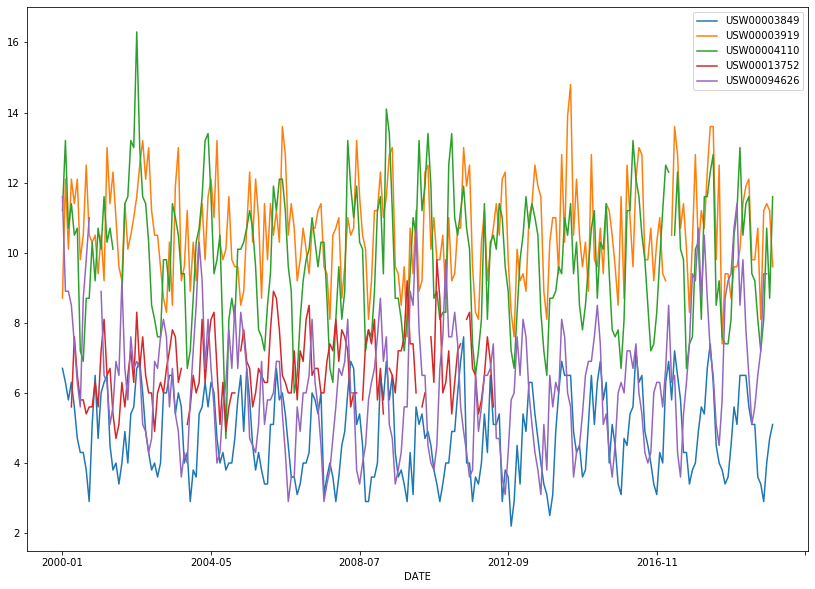

In [22]:
groupBy = 'STATION'
x = 'DATE'
y = 'AverageWindSpeed'
multiLinePlot(dfClimate_StationIndex, groupBy, x, y)

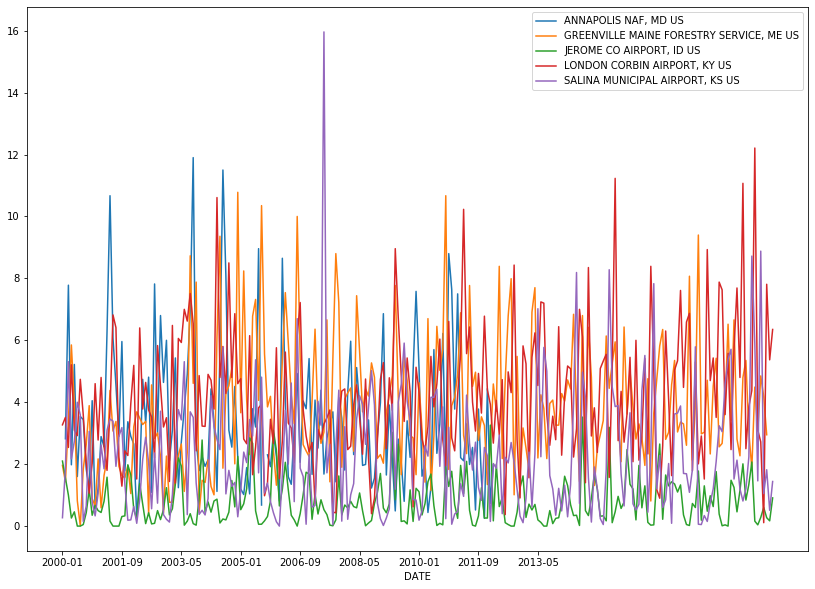

In [23]:
groupBy = 'NAME'
x = 'DATE'
y = 'Precipitation'
multiLinePlot(dfClimate_StationIndex, groupBy, x, y)

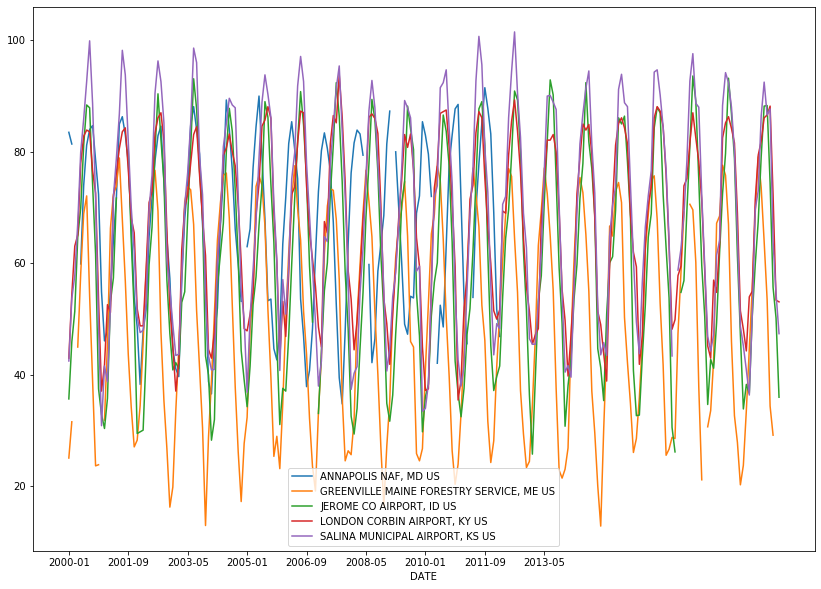

In [24]:
groupBy = 'NAME'
x = 'DATE'
y = 'MaxTemp'
multiLinePlot(dfClimate_StationIndex, groupBy, x, y)

# Space Weather Data Cleaning 

In [25]:
#Because my Climate Data goes from 2000-2019, i need to further subset my space weather data for the same date ranges 
isGT2000 = dfSpaceWeather['Year'] >= 2000
dfSpaceWeather = dfSpaceWeather[isGT2000]
isLT2020 = dfSpaceWeather['Year'] < 2020
dfSpaceWeather = dfSpaceWeather[isLT2020]
dfSpaceWeather

,Year,Month,Day,BartelsSolarRotationNumber,NumberofDaywithintheBartels,Kp_0000_0300,Kp_0300_0600,Kp_0600_0900,Kp_0900_1200,Kp_1200_1500,...,PlanetaryDailyCharacterFigure,CpConversion,InternationalSunspotNumber,SoloarRadioFlux,FluxQualifier,Centered81_dayArithmeticAverageofF10_7,Last81DayArithmeticAverageofF10_7,ObservedValueOfF10_7,Centered81DayArithmeticAverageOfF10_7,Last81DayArithmeticAverageOfF10_7
15432,2000,1,1,2272,7,53,47,40,33,43,...,1.3,6.0,48.0,125.6,0.0,160.5,175.0,129.9,165.6,179.0
15433,2000,1,2,2272,8,30,33,33,33,27,...,0.9,4.0,51.0,128.5,0.0,160.3,174.2,132.9,165.3,178.3
15434,2000,1,3,2272,9,33,30,27,27,23,...,0.7,3.0,54.0,128.7,0.0,160.0,173.3,133.1,165.0,177.4
15435,2000,1,4,2272,10,23,23,23,30,33,...,0.7,3.0,64.0,130.3,0.0,159.7,172.5,134.7,164.7,176.7
15436,2000,1,5,2272,11,40,33,33,33,23,...,1.0,5.0,73.0,132.0,0.0,159.4,171.8,136.5,164.4,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22732,2019,12,27,2542,17,10,10,10,10,0,...,0.0,72.0,0.0,71.1,68.8,74.4,73.3,70.3,NaN,NaN
22733,2019,12,28,2542,18,10,0,0,0,0,...,0.0,72.0,0.0,71.1,68.9,74.5,73.3,70.4,NaN,NaN
22734,2019,12,29,2542,19,0,0,0,0,0,...,0.0,72.0,0.0,71.1,68.9,74.5,73.4,70.5,NaN,NaN
22735,2019,12,30,2542,20,10,10,0,10,0,...,0.0,71.0,0.0,71.2,69.0,73.4,73.4,70.5,NaN,NaN


In [26]:
dfSpaceWeather['Year'].astype('int64')
dfSpaceWeather['Month'].astype('int64')
spaceWeather_Averages = dfSpaceWeather.groupby(['Year','Month']).agg({
    'SumOfKps': 'mean',
    'SoloarRadioFlux' : 'mean',
    'FluxQualifier' : 'mean',
    'Centered81_dayArithmeticAverageofF10_7' : 'mean',
    'Last81DayArithmeticAverageofF10_7' : 'mean', 
    'ObservedValueOfF10_7' : 'mean',
    'Centered81DayArithmeticAverageOfF10_7' : 'mean',
    'Last81DayArithmeticAverageOfF10_7' : 'mean'
})
spaceWeather_Averages

SumOfKps  SoloarRadioFlux  FluxQualifier  \
Year Month                                               
2000 1      187.645161       153.067742       0.064516   
     2      205.689655       169.117241       0.068966   
     3      145.322581       206.119355       0.000000   
     4      190.033333       185.490000       0.000000   
     5      196.741935       188.725806       0.064516   
...                ...              ...            ...   
2019 8      109.258065        68.661290       0.000000   
     9      151.633333        68.803333       0.000000   
     10     126.032258        67.009677       0.000000   
     11      79.333333        68.663333       0.000000   
     12      67.419355        70.593548      68.380645   

            Centered81_dayArithmeticAverageofF10_7  \
Year Month                                           
2000 1                                  162.309677   
     2                                  175.689655   
     3                                  187.287097   
     4                                  192.420000   
     5                                  186.835484   
...                                            ...   
2019 8                                   68.987097   
     9                                   68.200000   
     10                                  68.029032   
     11                                  68.796667   
     12                                  73.248387   

            Last81DayArithmeticAverageofF10_7  ObservedValueOfF10_7  \
Year Month                                                            
2000 1                             171.774194            158.132258   
     2                             160.893103            173.241379   
     3                             170.693548            208.154839   
     4                             184.963333            184.163333   
     5                             191.977419            184.529032   
...                                       ...                   ...   
2019 8                              69.619355             66.974194   
     9                              69.096667             68.063333   
     10                             68.448387             67.429032   
     11                             68.026667             70.183333   
     12                             72.683871             69.506452   

            Centered81DayArithmeticAverageOfF10_7  \
Year Month                                          
2000 1                                 167.190323   
     2                                 179.472414   
     3                                 188.951613   
     4                                 191.240000   
     5                                 183.041935   
...                                           ...   
2019 8                                  67.429032   
     9                                  67.516667   
     10                                 68.416129   
     11                                 70.223333   
     12                                       NaN   

            Last81DayArithmeticAverageOfF10_7  
Year Month                                     
2000 1                             176.454839  
     2                             165.889655  
     3                             174.983871  
     4                             187.373333  
     5                             191.729032  
...                                       ...  
2019 8                              67.535484  
     9                              67.340000  
     10                             67.464516  
     11                             68.073333  
     12                                   NaN  

[240 rows x 8 columns]

# Climate Data Cleaning 

In [27]:
dfClimate.STATION.unique()

array(['USW00003849', 'USW00004110', 'USW00003919', 'USW00094626',
       'USW00013752'], dtype=object)

In [28]:
#Break Climate Data up to only show columns:AverageWindSpeed, Precipitation, Snowfall, AverageTemp and TotalSunshinePeriod
sub_columns = ['DATE', 'NAME', 'AverageWindSpeed','Precipitation','Snowfall','AverageTemp','TotalSunshinePeriod']
dfClimate = dfClimate[sub_columns]
dfClimate.head()

,DATE,NAME,AverageWindSpeed,Precipitation,Snowfall,AverageTemp,TotalSunshinePeriod
0,2000-01,"LONDON CORBIN AIRPORT, KY US",6.7,3.27,NaN,33.9,NaN
1,2000-02,"LONDON CORBIN AIRPORT, KY US",6.3,3.51,NaN,43.0,NaN
2,2000-03,"LONDON CORBIN AIRPORT, KY US",5.8,2.54,NaN,50.8,NaN
3,2000-04,"LONDON CORBIN AIRPORT, KY US",6.3,5.21,NaN,54.0,NaN
4,2000-05,"LONDON CORBIN AIRPORT, KY US",5.6,3.10,NaN,66.7,NaN


In [29]:
#Need to look at the values of snowfall to see if they are all NaN, if so, it will not be a good variable 
dfClimate.Snowfall.unique()

array([nan])

In [30]:
#Also need to look at values of TotalSunshinePeriod to see if they are all NaN
dfClimate.TotalSunshinePeriod.unique()

array([nan,  0.])

In [31]:
#Remove snowfall and TotalSunshinePeriod from the subset 
del dfClimate['Snowfall']
del dfClimate['TotalSunshinePeriod']
dfClimate

,DATE,NAME,AverageWindSpeed,Precipitation,AverageTemp
0,2000-01,"LONDON CORBIN AIRPORT, KY US",6.7,3.27,33.9
1,2000-02,"LONDON CORBIN AIRPORT, KY US",6.3,3.51,43.0
2,2000-03,"LONDON CORBIN AIRPORT, KY US",5.8,2.54,50.8
3,2000-04,"LONDON CORBIN AIRPORT, KY US",6.3,5.21,54.0
4,2000-05,"LONDON CORBIN AIRPORT, KY US",5.6,3.10,66.7
...,...,...,...,...,...
1099,2019-08,"ANNAPOLIS NAF, MD US",5.8,1.50,80.7
1100,2019-09,"ANNAPOLIS NAF, MD US",6.5,0.25,76.1
1101,2019-10,"ANNAPOLIS NAF, MD US",7.6,4.44,62.4
1102,2019-11,"ANNAPOLIS NAF, MD US",6.9,0.73,45.0


In [32]:
#Group climate data by date
dfClimate[['Year','Month']] = dfClimate['DATE'].str.split('-',expand=True)

c:\users\heath\.conda\envs\opencv\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
del dfClimate['DATE']
dfClimate

,NAME,AverageWindSpeed,Precipitation,AverageTemp,Year,Month
0,"LONDON CORBIN AIRPORT, KY US",6.7,3.27,33.9,2000,01
1,"LONDON CORBIN AIRPORT, KY US",6.3,3.51,43.0,2000,02
2,"LONDON CORBIN AIRPORT, KY US",5.8,2.54,50.8,2000,03
3,"LONDON CORBIN AIRPORT, KY US",6.3,5.21,54.0,2000,04
4,"LONDON CORBIN AIRPORT, KY US",5.6,3.10,66.7,2000,05
...,...,...,...,...,...,...
1099,"ANNAPOLIS NAF, MD US",5.8,1.50,80.7,2019,08
1100,"ANNAPOLIS NAF, MD US",6.5,0.25,76.1,2019,09
1101,"ANNAPOLIS NAF, MD US",7.6,4.44,62.4,2019,10
1102,"ANNAPOLIS NAF, MD US",6.9,0.73,45.0,2019,11


# Data Merging 

In [34]:
dfClimate['Year'] = dfClimate.Year.astype('int64')
dfClimate['Month'] = dfClimate.Month.astype('int64')
dfClimate = pd.DataFrame(dfClimate.set_index(['Year', 'Month']))
dfClimate

c:\users\heath\.conda\envs\opencv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\heath\.conda\envs\opencv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NAME  AverageWindSpeed  Precipitation  \
Year Month                                                                  
2000 1      LONDON CORBIN AIRPORT, KY US               6.7           3.27   
     2      LONDON CORBIN AIRPORT, KY US               6.3           3.51   
     3      LONDON CORBIN AIRPORT, KY US               5.8           2.54   
     4      LONDON CORBIN AIRPORT, KY US               6.3           5.21   
     5      LONDON CORBIN AIRPORT, KY US               5.6           3.10   
...                                  ...               ...            ...   
2019 8              ANNAPOLIS NAF, MD US               5.8           1.50   
     9              ANNAPOLIS NAF, MD US               6.5           0.25   
     10             ANNAPOLIS NAF, MD US               7.6           4.44   
     11             ANNAPOLIS NAF, MD US               6.9           0.73   
     12             ANNAPOLIS NAF, MD US               5.6           1.98   

            AverageTemp  
Year Month               
2000 1             33.9  
     2             43.0  
     3             50.8  
     4             54.0  
     5             66.7  
...                 ...  
2019 8             80.7  
     9             76.1  
     10            62.4  
     11            45.0  
     12            40.7  

[1104 rows x 4 columns]

In [35]:
# Perform an inner join on the employees and departments data frames 
dfMergedData = pd.merge(spaceWeather_Averages, dfClimate, how = 'right', left_on=None, right_on=None, left_index=True, right_index=True)

In [36]:
dfMergedData

SumOfKps  SoloarRadioFlux  FluxQualifier  \
Year Month                                               
2000 1      187.645161       153.067742       0.064516   
     1      187.645161       153.067742       0.064516   
     1      187.645161       153.067742       0.064516   
     1      187.645161       153.067742       0.064516   
     2      205.689655       169.117241       0.068966   
...                ...              ...            ...   
2019 12      67.419355        70.593548      68.380645   
     12      67.419355        70.593548      68.380645   
     12      67.419355        70.593548      68.380645   
     12      67.419355        70.593548      68.380645   
     12      67.419355        70.593548      68.380645   

            Centered81_dayArithmeticAverageofF10_7  \
Year Month                                           
2000 1                                  162.309677   
     1                                  162.309677   
     1                                  162.309677   
     1                                  162.309677   
     2                                  175.689655   
...                                            ...   
2019 12                                  73.248387   
     12                                  73.248387   
     12                                  73.248387   
     12                                  73.248387   
     12                                  73.248387   

            Last81DayArithmeticAverageofF10_7  ObservedValueOfF10_7  \
Year Month                                                            
2000 1                             171.774194            158.132258   
     1                             171.774194            158.132258   
     1                             171.774194            158.132258   
     1                             171.774194            158.132258   
     2                             160.893103            173.241379   
...                                       ...                   ...   
2019 12                             72.683871             69.506452   
     12                             72.683871             69.506452   
     12                             72.683871             69.506452   
     12                             72.683871             69.506452   
     12                             72.683871             69.506452   

            Centered81DayArithmeticAverageOfF10_7  \
Year Month                                          
2000 1                                 167.190323   
     1                                 167.190323   
     1                                 167.190323   
     1                                 167.190323   
     2                                 179.472414   
...                                           ...   
2019 12                                       NaN   
     12                                       NaN   
     12                                       NaN   
     12                                       NaN   
     12                                       NaN   

            Last81DayArithmeticAverageOfF10_7  \
Year Month                                      
2000 1                             176.454839   
     1                             176.454839   
     1                             176.454839   
     1                             176.454839   
     2                             165.889655   
...                                       ...   
2019 12                                   NaN   
     12                                   NaN   
     12                                   NaN   
     12                                   NaN   
     12                                   NaN   

                                                NAME  AverageWindSpeed  \
Year Month                                                               
2000 1                  LONDON CORBIN AIRPORT, KY US               6.7   
     1                      JEROME CO AIRPORT, ID US              11.2   
     1  

In [109]:
dfFinal = dfMergedData.set_index('NAME',append=True)
dfFinal.head()

SumOfKps  \
Year Month NAME                                                   
2000 1     LONDON CORBIN AIRPORT, KY US              187.645161   
           JEROME CO AIRPORT, ID US                  187.645161   
           SALINA MUNICIPAL AIRPORT, KS US           187.645161   
           GREENVILLE MAINE FORESTRY SERVICE, ME US  187.645161   
     2     LONDON CORBIN AIRPORT, KY US              205.689655   

                                                     SoloarRadioFlux  \
Year Month NAME                                                        
2000 1     LONDON CORBIN AIRPORT, KY US                   153.067742   
           JEROME CO AIRPORT, ID US                       153.067742   
           SALINA MUNICIPAL AIRPORT, KS US                153.067742   
           GREENVILLE MAINE FORESTRY SERVICE, ME US       153.067742   
     2     LONDON CORBIN AIRPORT, KY US                   169.117241   

                                                     FluxQualifier  \
Year Month NAME                                                      
2000 1     LONDON CORBIN AIRPORT, KY US                   0.064516   
           JEROME CO AIRPORT, ID US                       0.064516   
           SALINA MUNICIPAL AIRPORT, KS US                0.064516   
           GREENVILLE MAINE FORESTRY SERVICE, ME US       0.064516   
     2     LONDON CORBIN AIRPORT, KY US                   0.068966   

                                                     Centered81_dayArithmeticAverageofF10_7  \
Year Month NAME                                                                               
2000 1     LONDON CORBIN AIRPORT, KY US                                          162.309677   
           JEROME CO AIRPORT, ID US                                              162.309677   
           SALINA MUNICIPAL AIRPORT, KS US                                       162.309677   
           GREENVILLE MAINE FORESTRY SERVICE, ME US                              162.309677   
     2     LONDON CORBIN AIRPORT, KY US                                          175.689655   

                                                     Last81DayArithmeticAverageofF10_7  \
Year Month NAME                                                                          
2000 1     LONDON CORBIN AIRPORT, KY US                                     171.774194   
           JEROME CO AIRPORT, ID US                                         171.774194   
           SALINA MUNICIPAL AIRPORT, KS US                                  171.774194   
           GREENVILLE MAINE FORESTRY SERVICE, ME US                         171.774194   
     2     LONDON CORBIN AIRPORT, KY US                                     160.893103   

                                                     ObservedValueOfF10_7  \
Year Month NAME                                                             
2000 1     LONDON CORBIN AIRPORT, KY US                        158.132258   
           JEROME CO AIRPORT, ID US                            158.132258   
           SALINA MUNICIPAL AIRPORT, KS US                     158.132258   
           GREENVILLE MAINE FORESTRY SERVICE, ME US            158.132258   
     2     LONDON CORBIN AIRPORT, KY US                        173.241379   

                                                     Centered81DayArithmeticAverageOfF10_7  \
Year Month NAME                                                                              
2000 1     LONDON CORBIN AIRPORT, KY US                                         167.190323   
           JEROME CO AIRPORT, ID US                                             167.190323   
           SALINA MUNICIPAL AIRPORT, KS US                                      167.190323   
           GREENVILLE MAINE FORESTRY SERVICE, ME US                             167.190323   
     2     LONDON CORBIN AIRPORT, KY US                                         179.472414   

                                                     Last81DayArithmeticAverageOfF10_7  \
Yea

# Merged Data Visualization

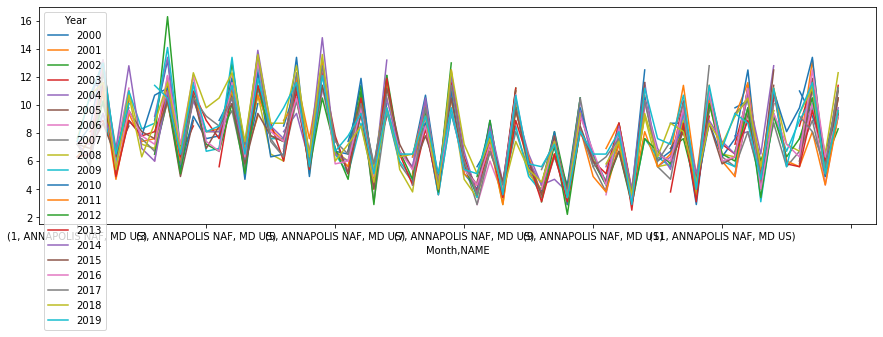

In [58]:
dfFinal.AverageWindSpeed.unstack(level=0).plot(kind='line', subplots=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002650FE90C08>,
      dtype=object)

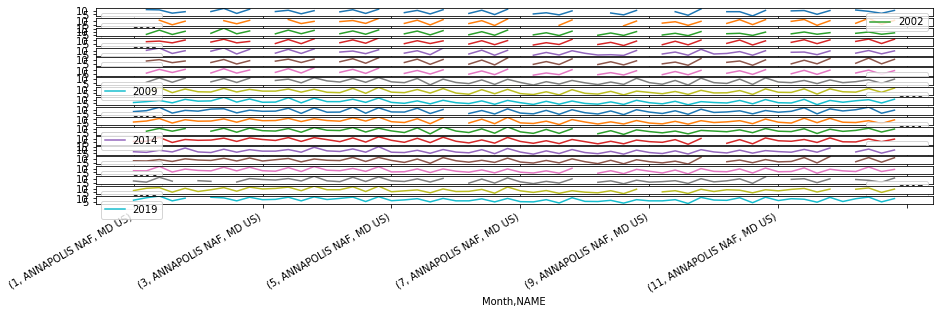

In [59]:
dfFinal.AverageWindSpeed.unstack(level=0).plot(kind='line', subplots=True)

# Model Building 

## Linear and Multiple Regression

In [63]:
# Simple Linear Regression 
# How is the Average Wind Speed affected by Kp Index
model1 = smf.ols(formula = 'AverageWindSpeed ~ SumOfKps', data = dfFinal)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:       AverageWindSpeed   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.898
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.169
Time:                        14:40:10   Log-Likelihood:                -2639.7
No. Observations:                1088   AIC:                             5283.
Df Residuals:                    1086   BIC:                             5293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3879      0.270     27.366      0.0

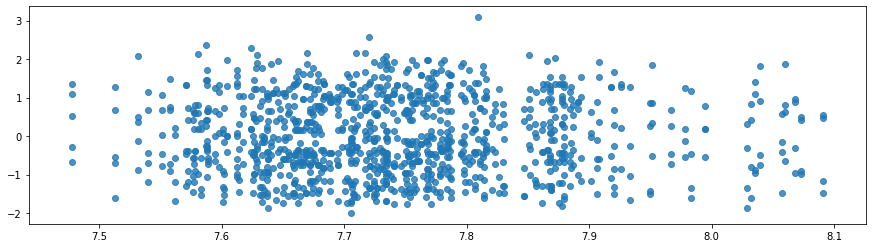

In [84]:
fig, ax = plt.subplots()
ax = sns.regplot(x = results1.fittedvalues, y=results1.resid_pearson, fit_reg=False)
plt.show()

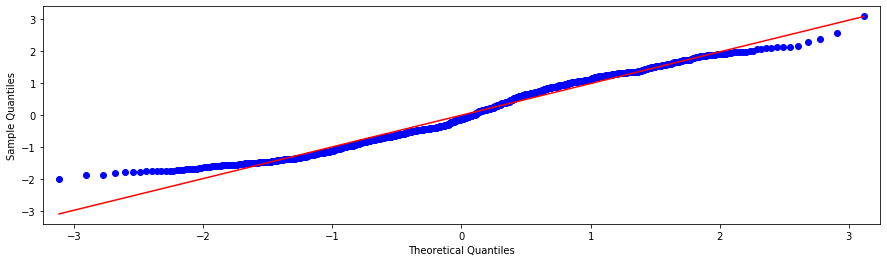

In [101]:
#Q-Q Plots 
resid = results1.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

In [67]:
# How is the Average Temperature affected by Kp Index 
model2 = smf.ols(formula = 'AverageTemp ~ SumOfKps', data = dfFinal)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            AverageTemp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.175
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.141
Time:                        14:45:57   Log-Likelihood:                -4683.2
No. Observations:                1087   AIC:                             9370.
Df Residuals:                    1085   BIC:                             9380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6349      1.773     27.991      0.0

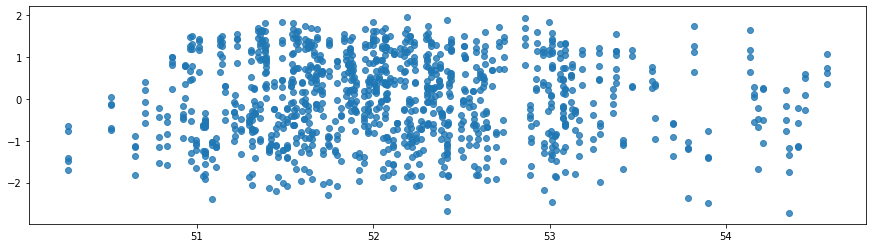

In [85]:
fig, ax = plt.subplots()
ax = sns.regplot(x = results2.fittedvalues, y=results2.resid_pearson, fit_reg=False)
plt.show()

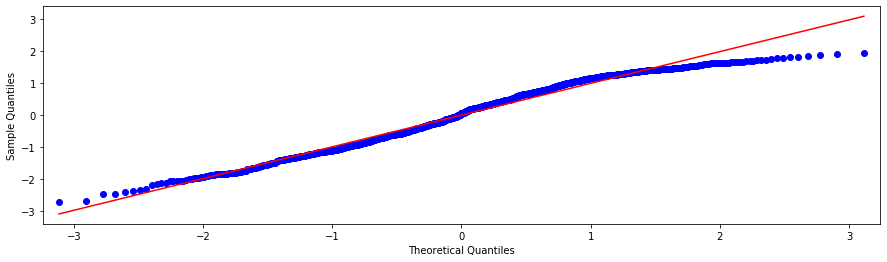

In [102]:
#Q-Q Plots 
resid = results2.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

In [76]:
# Multiple Linear Regression 
multipleModel1 = smf.ols(formula = 'AverageWindSpeed ~ SumOfKps + SoloarRadioFlux + FluxQualifier + ObservedValueOfF10_7', data = dfFinal)
resultsMultipleModel1 = multipleModel1.fit()
print(resultsMultipleModel1.summary())

                            OLS Regression Results                            
Dep. Variable:       AverageWindSpeed   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     14.46
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.65e-11
Time:                        14:54:34   Log-Likelihood:                -2612.3
No. Observations:                1088   AIC:                             5235.
Df Residuals:                    1083   BIC:                             5260.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.1529 

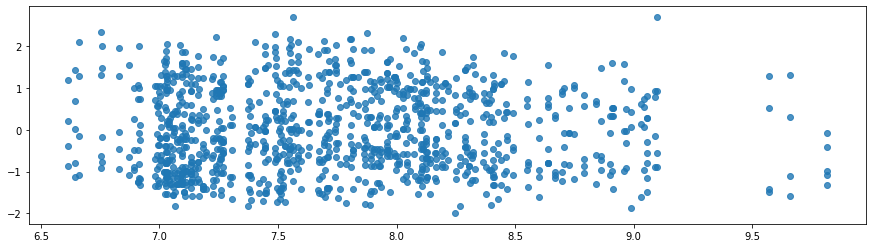

In [86]:
fig, ax = plt.subplots()
ax = sns.regplot(x = resultsMultipleModel1.fittedvalues, y=resultsMultipleModel1.resid_pearson, fit_reg=False)
plt.show()

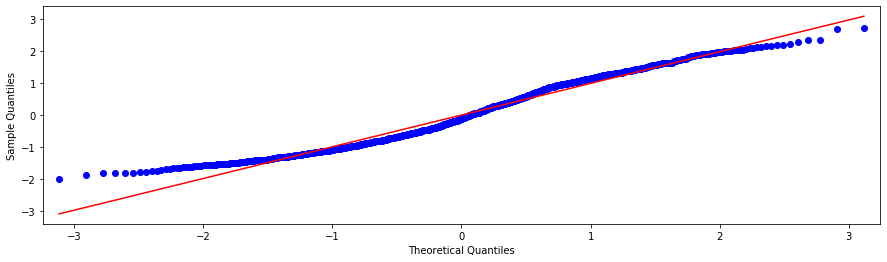

In [103]:
#Q-Q Plots 
resid = resultsMultipleModel1.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

In [77]:
# Multiple Linear Regression 
multipleModel2 = smf.ols(formula = 'AverageTemp ~ SumOfKps + SoloarRadioFlux + FluxQualifier + ObservedValueOfF10_7', data = dfFinal)
resultsMultipleModel2 = multipleModel2.fit()
print(resultsMultipleModel2.summary())

                            OLS Regression Results                            
Dep. Variable:            AverageTemp   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     537.0
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          3.94e-255
Time:                        14:55:56   Log-Likelihood:                -4089.9
No. Observations:                1087   AIC:                             8190.
Df Residuals:                    1082   BIC:                             8215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               52.4251 

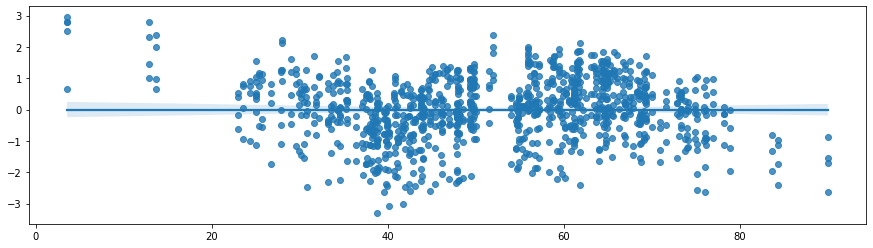

In [89]:
fig, ax = plt.subplots()
ax = sns.regplot(x = resultsMultipleModel2.fittedvalues, y=resultsMultipleModel2.resid_pearson, fit_reg=True)
plt.show()

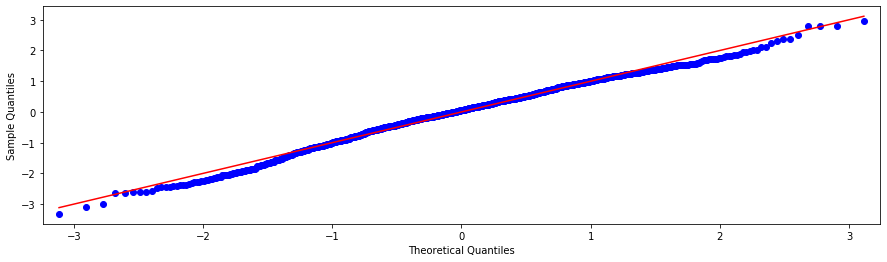

In [104]:
#Q-Q Plots 
resid = resultsMultipleModel2.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

In [78]:
# Multiple Linear Regression 
multipleModel3 = smf.ols(formula = 'Precipitation ~ SumOfKps + SoloarRadioFlux + FluxQualifier + ObservedValueOfF10_7', data = dfFinal)
resultsMultipleModel3 = multipleModel3.fit()
print(resultsMultipleModel3.summary())

                            OLS Regression Results                            
Dep. Variable:          Precipitation   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.338
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           2.01e-07
Time:                        14:56:22   Log-Likelihood:                -2465.8
No. Observations:                1102   AIC:                             4942.
Df Residuals:                    1097   BIC:                             4967.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7469 

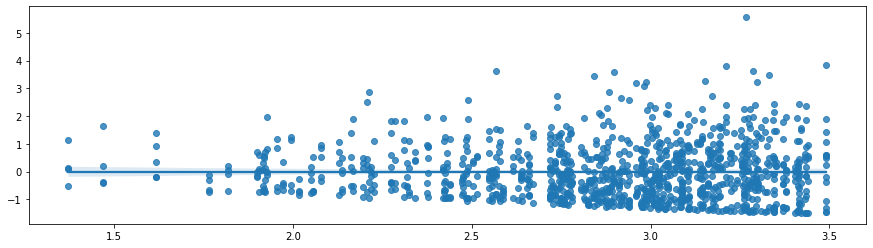

In [90]:
fig, ax = plt.subplots()
ax = sns.regplot(x = resultsMultipleModel3.fittedvalues, y=resultsMultipleModel3.resid_pearson, fit_reg=True)
plt.show()

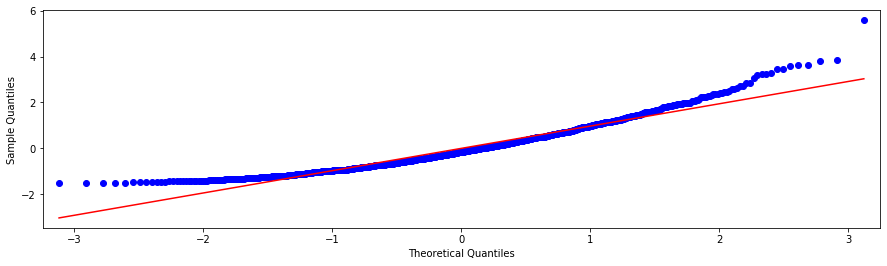

In [105]:
#Q-Q Plots 
resid = resultsMultipleModel3.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

#### Based on a quick look at the above models, SolarRadioFlux and F10.7 may have a slight effect on Average Temperature

In [80]:
#Poisson Regression 
pRegModel = smf.poisson('AverageWindSpeed ~ SumOfKps + SoloarRadioFlux + FluxQualifier + ObservedValueOfF10_7', data = dfFinal)
resultsPRegModel = pRegModel.fit()
print(resultsPRegModel.summary())

Optimization terminated successfully.
         Current function value: 2.391864
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:       AverageWindSpeed   No. Observations:                 1088
Model:                        Poisson   Df Residuals:                     1083
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                 0.01003
Time:                        16:05:44   Log-Likelihood:                -2602.3
converged:                       True   LL-Null:                       -2628.7
Covariance Type:            nonrobust   LLR p-value:                 9.816e-11
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9732      0.039     50.195      0.000       1.896       2.050

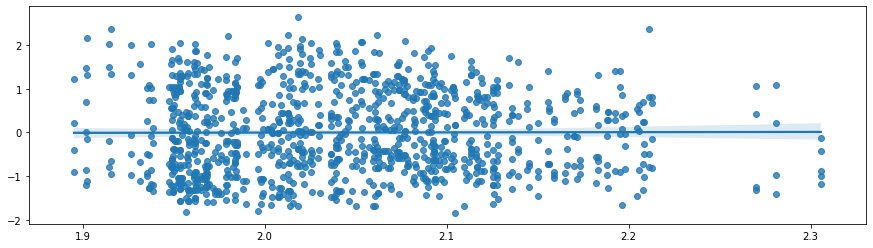

In [92]:
fig, ax = plt.subplots()
ax = sns.regplot(x = resultsPRegModel.fittedvalues, y=resultsPRegModel.resid_pearson, fit_reg=True)
plt.show()

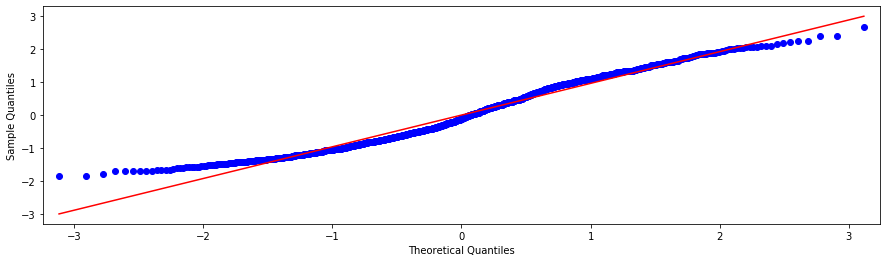

In [106]:
#Q-Q Plots 
resid = resultsPRegModel.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

In [81]:
pRegModel2 = smf.poisson('AverageTemp ~ SumOfKps + SoloarRadioFlux + FluxQualifier + ObservedValueOfF10_7', data = dfFinal)
resultsPRegModel2 = pRegModel2.fit()
print(resultsPRegModel2.summary())

Optimization terminated successfully.
         Current function value: 4.078137
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:            AverageTemp   No. Observations:                 1087
Model:                        Poisson   Df Residuals:                     1082
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                  0.3442
Time:                        16:06:55   Log-Likelihood:                -4432.9
converged:                       True   LL-Null:                       -6759.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.9907      0.015    261.075      0.000       3.961       4.021

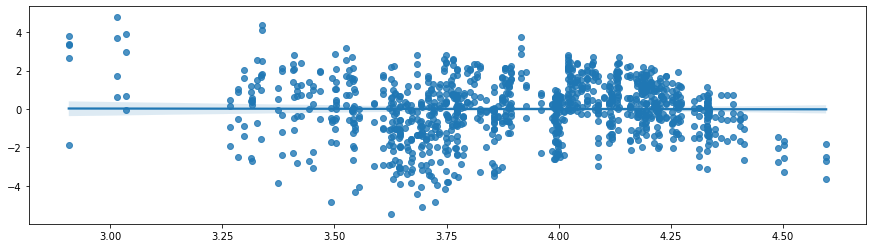

In [93]:
fig, ax = plt.subplots()
ax = sns.regplot(x = resultsPRegModel2.fittedvalues, y=resultsPRegModel2.resid_pearson, fit_reg=True)
plt.show()

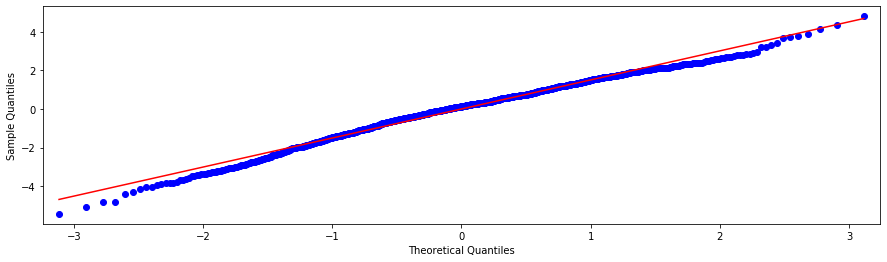

In [107]:
#Q-Q Plots 
resid = resultsPRegModel2.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

In [82]:
pRegModel3 = smf.poisson('Precipitation ~ SumOfKps + SoloarRadioFlux + FluxQualifier + ObservedValueOfF10_7', data = dfFinal)
resultsPRegModel3 = pRegModel3.fit()
print(resultsPRegModel3.summary())

Optimization terminated successfully.
         Current function value: 2.188087
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:          Precipitation   No. Observations:                 1102
Model:                        Poisson   Df Residuals:                     1097
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                 0.01444
Time:                        16:07:55   Log-Likelihood:                -2411.3
converged:                       True   LL-Null:                       -2446.6
Covariance Type:            nonrobust   LLR p-value:                 1.649e-14
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3715      0.065     21.156      0.000       1.244       1.499

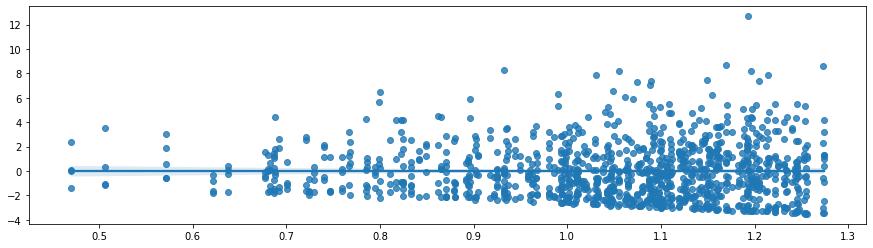

In [96]:
fig, ax = plt.subplots()
ax = sns.regplot(x = resultsPRegModel3.fittedvalues, y=resultsPRegModel3.resid_response, fit_reg=True)
plt.show()

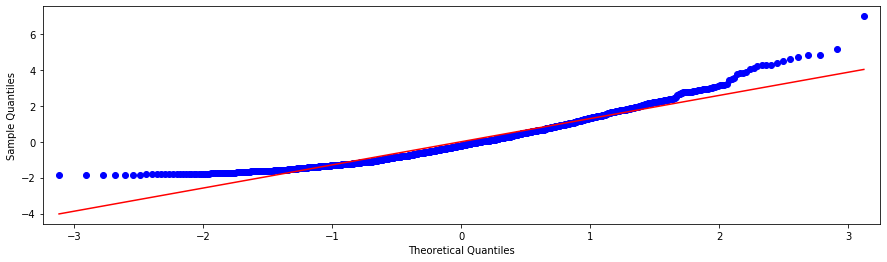

In [108]:
#Q-Q Plots 
resid = resultsPRegModel3.resid_pearson.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()